# Project 1

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Checkered Board

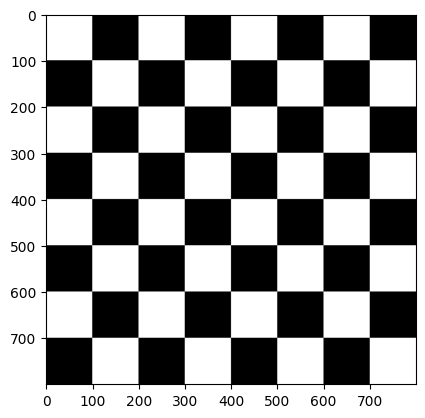

In [15]:
def create_chess_table(board_size=8, cell_size=100, black=(255, 255, 255), white=(0, 0, 0)):
    height = board_size * cell_size
    width = board_size * cell_size
    image = np.zeros((height, width, 3), dtype=np.uint8)

    # Fill the cells with alternating colors
    for i in range(board_size):
        for j in range(board_size):
            x = j * cell_size
            y = i * cell_size
            color = black if (i + j) % 2 == 0 else white
            cv2.rectangle(image, (x, y), (x + cell_size, y + cell_size), color, -1)

    return image

chess_table = create_chess_table()

chess_table_rgb = cv2.cvtColor(chess_table, cv2.COLOR_BGR2RGB)

plt.imshow(chess_table_rgb)
plt.show()


# Color Correction

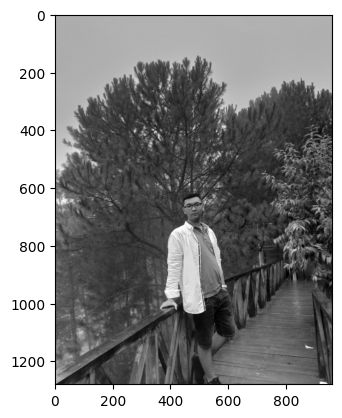

In [16]:
def convert_gray(img):
    grey_image = img[:,:,0]*0.07 + img[:,:,1]*0.72 + img[:,:,2]*0.21
    return grey_image

img = cv2.imread('pine.jpg')

img_grey = convert_gray(img)

plt.imshow(img_grey, cmap='gray')


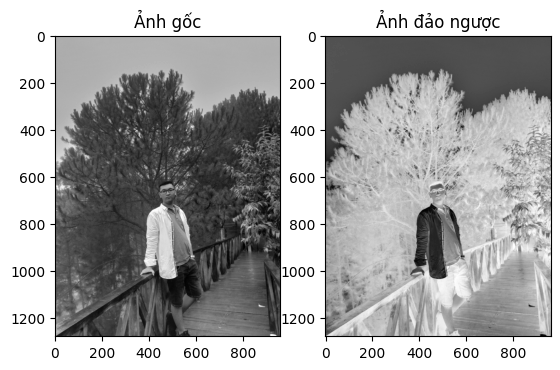

In [17]:
def convert_gray(img):
    grey_image = img[:,:,0]*0.07 + img[:,:,1]*0.72 + img[:,:,2]*0.21
    return grey_image

def invert_image(img):
  inverted_img = 255 - img
  return inverted_img

img = cv2.imread('pine.jpg')

img_grey = convert_gray(img) # Chuyển sang màu xám

inverted_img = invert_image(img_grey) # Đảo ngược các giá trị màu

plt.subplot(1, 2, 1)
plt.imshow(img_grey, cmap='gray')
plt.title('Ảnh gốc')

plt.subplot(1, 2, 2)
plt.imshow(inverted_img, cmap='gray')
plt.title('Ảnh đảo ngược')

plt.show()

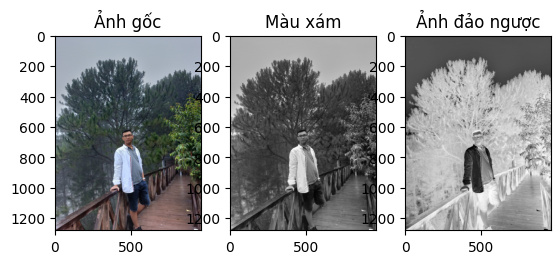

In [18]:
# Hiển thị ảnh bằng matplotlib
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.title('Ảnh gốc')

plt.subplot(1, 3, 2)
plt.imshow(img_grey, cmap='gray')
plt.title('Màu xám')

plt.subplot(1, 3, 3)
plt.imshow(inverted_img, cmap='gray')
plt.title('Ảnh đảo ngược')

plt.show()

# Rotate Image

In [19]:
def invert_image_horizontal(img):

  inverted_img = img[:, ::-1]
  return inverted_img

def invert_image_vertical(img):

  inverted_img = img[::-1, :]
  return inverted_img

def rotate_image(img, angle):
  height, width = img.shape[:2]
  
  # Tính toán tâm xoay (trung điểm của ảnh)
  center = (width / 2, height / 2)

  # Tạo ma trận xoay
  rotate_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

  # Áp dụng ma trận xoay lên ảnh
  rotated_image = cv2.warpAffine(img, rotate_matrix, (width, height))

  return rotated_image


img = cv2.imread('Trung.jpg')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

horizontal = invert_image_horizontal(img_rgb)

# Đảo ngược chiều dọc
vertical = invert_image_vertical(img_rgb)
rotated_image = rotate_image(img_rgb, 20)

# Hiển thị ảnh bằng matplotlib
plt.subplot(1, 4, 1)
plt.imshow(img_rgb)
plt.title('Ảnh gốc')

plt.subplot(1, 4, 2)
plt.imshow(horizontal)
plt.title('Đảo ngang')

plt.subplot(1, 4, 3)
plt.imshow(vertical)
plt.title('Đảo  dọc')

plt.subplot(1, 4, 4)
plt.imshow(rotated_image)
plt.title('Xoay 20 độ')

plt.show()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


# Color separate

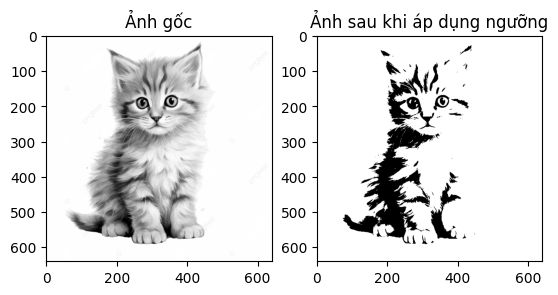

In [ ]:
def separate_objects(threshold_value):

  # Áp dụng ngưỡng
  ret, thresh = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)

  return thresh

img = cv2.imread('Meo.png', cv2.IMREAD_GRAYSCALE)

threshold = 140

result = separate_objects(threshold)

# Hiển thị ảnh
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Ảnh gốc')

plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.title('Ảnh sau khi áp dụng ngưỡng')

plt.show()

# Corner line

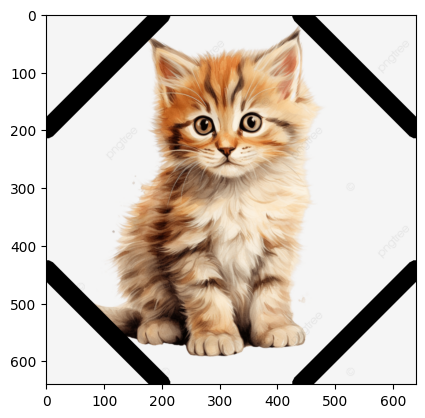

In [ ]:
def line_black(img, shape, line_width):
    image = cv2.line(img, (0,shape[0]-440), (shape[1]-440, 0), (0,0,0), line_width)
    image = cv2.line(img, (0,shape[0]-200), (shape[1]-440, shape[1]), (0,0,0), line_width)
    image = cv2.line(img, (shape[0]-200,0), (shape[0], shape[1]-440), (0,0,0), line_width)
    image = cv2.line(img, (shape[0]-200, shape[1]), (shape[0], shape[1]-200), (0,0,0), line_width)
    
    return image

img = cv2.imread('Meo.png')
shape = img.shape
line_width = 30

line_image = line_black(img, shape, line_width)

plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.show()

# Gradient

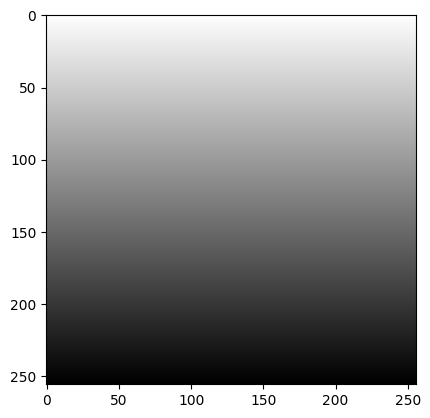

In [ ]:
def vertical_gradient_white_to_black(width, height):
    # Tạo mảng zero cho ảnh với 3 kênh màu (RGB)
    x = np.zeros((height, width, 3), dtype=np.uint8)

    # Tạo gradient theo chiều dọc (màu trắng từ trên xuống đen ở dưới)
    y_coords = np.linspace(255, 0, height).astype(np.uint8)

    # Áp dụng gradient cho từng kênh màu
    x[:, :, 0] = y_coords[:, None]
    x[:, :, 1] = y_coords[:, None]
    x[:, :, 2] = y_coords[:, None]

    return x

width, height = 256, 256

gr = vertical_gradient_white_to_black(width, height)
s
plt.imshow(gr, cmap='gray')
plt.show()


# Letter B

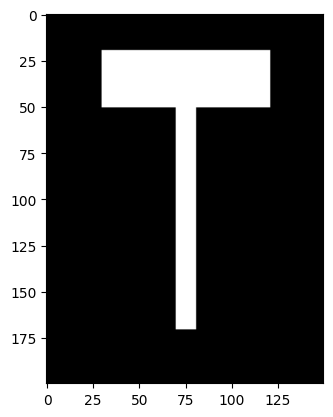

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Kích thước của hình ảnh
height, width = 200, 150

# Tạo một ma trận toàn màu đen (0)
img = np.zeros((height, width), dtype=np.uint8)

# Vẽ chữ T bằng cách sử dụng các hình chữ nhật
# Thanh ngang trên cùng
cv2.rectangle(img, (0, 20), (120, 50), (255, 255, 255), -1)
# Thanh dọc ở giữa
cv2.rectangle(img, (70, 50), (80, 170), (255, 255, 255), -1)

# Hiển thị hình ảnh
plt.imshow(img, cmap='gray')  # 'gray' để hiển thị ảnh xám
# plt.axis('off')  # Tắt trục để chỉ hiển thị hình ảnh
plt.show()


# Find secret by subtract

In [ ]:
#Tạo ra ảnh mới từ ảnh find_sub_1
# img = cv2.imread('find_sub_1.jpg')
# img = 255 - img
# cv2.rectangle(img, (350, 25), (470, 120), (255, 255, 255), -1) 
# cv2.rectangle(img, (420, 320), (530, 420), (255, 255, 255), -1) 
# cv2.imwrite('find_sub_2.jpg', img)
# plt.imshow(img)

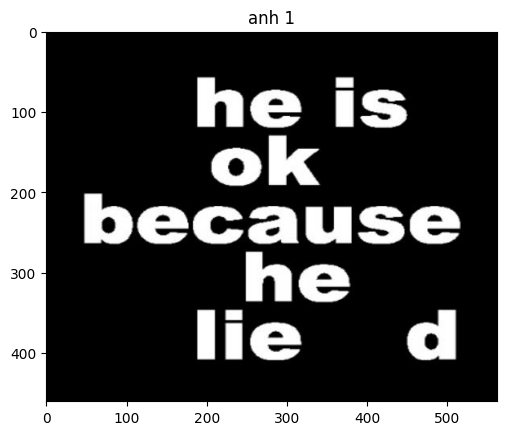

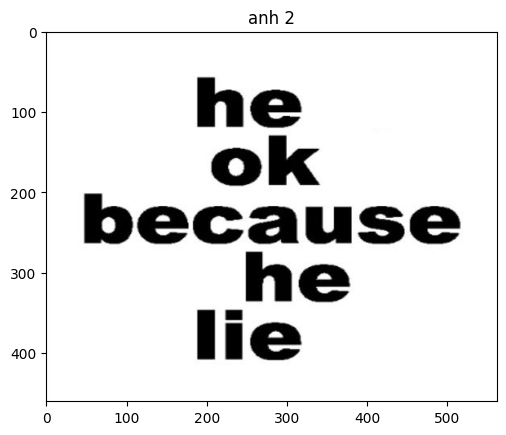

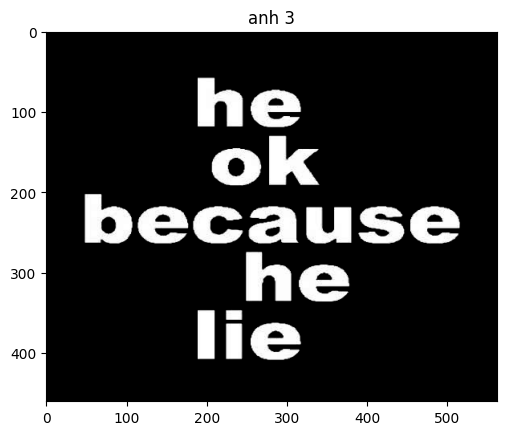

In [ ]:
def substrac(img1, img2):
    img1 = cv2.imread(img1)
    img2 = cv2.imread(img2)

    if img1.shape != img2.shape:
        img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

    difference = cv2.subtract(img1, img2)
    return difference

img1 = 'find_sub_1.jpg'
img2 = 'find_sub_2.jpg'

# plt.imshow(cv2.cvtColor(substrac(img1, img2), cv2.COLOR_BGR2RGB))
plt.title('anh 1')
plt.imshow(cv2.imread(img1), cmap='gray')
plt.show()

plt.title('anh 2')
plt.imshow(cv2.imread(img2), cmap='gray')
plt.show()

plt.title('anh 3')
plt.imshow(cv2.cvtColor(substrac(img1, img2), cv2.COLOR_BGR2RGB))
plt.show()
